In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/preprocessed_database_100000.csv",converters={"comment_text": lambda x: x.strip("[]").replace("'","").split(", "), "stemmed_text": lambda x: x.strip("[]").replace("'","").split(", ")})
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,stemmed_text
0,5101238,0.000000,"[thought, might, ontario, liberals, quota, sys...",0.000000,0.000000,0.000000,0.000000,0.0,approved,0,0,0,0,0,0.0,0,4,"[thought, might, ontario, liber, quota, system..."
1,5110214,0.000000,"[maybe, bob, welch, could, column, sometime, h...",0.000000,0.000000,0.000000,0.000000,0.0,approved,3,0,0,2,1,0.0,0,4,"[mayb, bob, welch, could, column, sometim, hig..."
2,825803,0.830508,"[trump, kgb, fsb, would, like, particularly, f...",0.084746,0.050847,0.016949,0.813559,0.0,approved,0,0,1,8,2,0.0,4,59,"[trump, kgb, fsb, would, like, particularli, f..."
3,813372,0.000000,"[maybe, kremlin, want, pay, back, maybe, milli...",0.000000,0.000000,0.000000,0.000000,0.0,approved,1,0,0,8,1,0.0,10,4,"[mayb, kremlin, want, pay, back, mayb, million..."
4,5346818,0.000000,"[joanne, codling, scientist, holds, undergradu...",0.000000,0.000000,0.000000,0.000000,0.0,approved,0,0,0,1,0,0.0,0,4,"[joann, codl, scientist, hold, undergradu, deg..."


In [5]:
drop_cols = [ 'severe_toxicity', 'obscene', "identity_attack", 'threat', 'insult', 'rating', "funny",	"wow",	"sad"	,"likes",	"disagree"	,"sexual_explicit"	,"identity_annotator_count",	"toxicity_annotator_count" ]
df = df.drop(drop_cols, axis=1)
df["label"]=df["target"].apply(lambda x: 1 if x>=0.5 else 0)
df.head()

,id,target,comment_text,stemmed_text,label
0,5101238,0.000000,"[thought, might, ontario, liberals, quota, sys...","[thought, might, ontario, liber, quota, system...",0
1,5110214,0.000000,"[maybe, bob, welch, could, column, sometime, h...","[mayb, bob, welch, could, column, sometim, hig...",0
2,825803,0.830508,"[trump, kgb, fsb, would, like, particularly, f...","[trump, kgb, fsb, would, like, particularli, f...",1
3,813372,0.000000,"[maybe, kremlin, want, pay, back, maybe, milli...","[mayb, kremlin, want, pay, back, mayb, million...",0
4,5346818,0.000000,"[joanne, codling, scientist, holds, undergradu...","[joann, codl, scientist, hold, undergradu, deg...",0


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
texts = df['stemmed_text'].astype(str)
labels = df['label']

# Use LabelEncoder to convert labels to numeric format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(texts)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(kernel='linear', C=3.0, degree=3, gamma='auto', probability=True)

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

Accuracy: 0.93675
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     10078
           1       0.95      0.92      0.94      9922

    accuracy                           0.94     20000
   macro avg       0.94      0.94      0.94     20000
weighted avg       0.94      0.94      0.94     20000

Confusion Matrix: 
[[9621  457]
 [ 808 9114]]


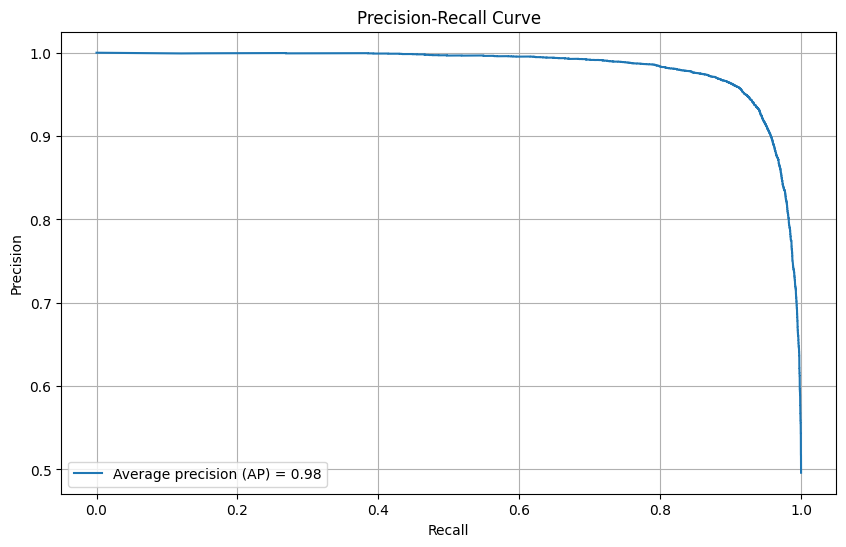

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


y_scores = svm_model.predict_proba(X_test)[:, 1]

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Compute average precision score
average_precision = average_precision_score(y_test, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'Average precision (AP) = {average_precision:0.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

C_values = [0.2, 0.5, 0.7, 0.9, 1, 1.2, 1.5, 2.5, 3]
test_accuracies = []

for C in C_values:
    svm_model = SVC(C=C, kernel='linear')
    svm_model.fit(X_train, y_train)

    # Evaluate on Testing Set
    y_test_pred = svm_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Plotting the test accuracies
plt.figure(figsize=(10, 6))
plt.plot(C_values, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('Test Accuracies for Different C values of SVM')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

accuracies = []

for kernel in kernels:
    svm_model = svm.SVC(kernel=kernel, gamma='auto')
    svm_model.fit(X_train, y_train)

    predictions = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions) * 100
    print(f'Kernel: {kernel} -> Accuracy: {accuracy}%')
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.bar(kernels, accuracies, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Kernel')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of SVM Kernel Accuracies')
plt.ylim([min(accuracies) - 5, 100])
plt.show()

In [ ]:
param_grid = {
    'C': [0.1, 0.5, 0.75, 0.8],
    'kernel': ['linear', 'rbf', 'poly'] #best 3 kernels for our svm
    }

grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters Found: ")
print(grid.best_params_)

best_svm_model = grid.best_estimator_
best_svm_model.fit(X_train, y_train)

predictions = best_svm_model.predict(X_test)

cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix: ")
print(cm)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
print("Classification Report: ")
print(classification_report(y_test, predictions))